In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib notebook

In [4]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import base

<IPython.core.display.Javascript object>


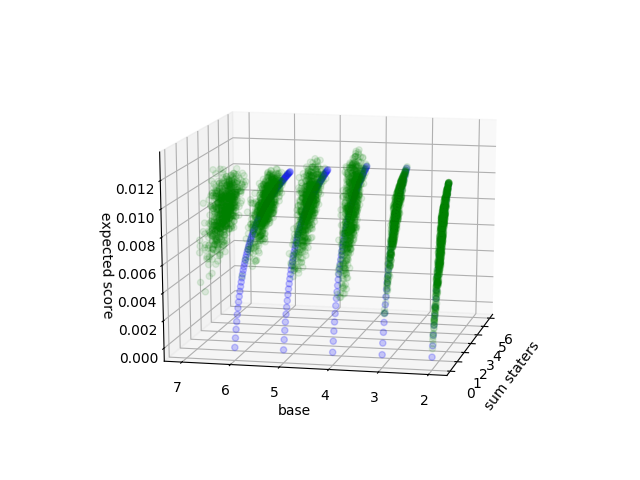

In [5]:
objnum = 12345678901234
o = base.Objective(objnum)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

res = 100
rss = (0.00001, 7)
rb = [i+2 for i in range(6)]
x1, y1, z1 = [], [], []
x2, y2, z2 = [], [], []
x3, y3, z3 = [], [], []
for ix in range(res):

    uss = rss[0] + (rss[1] - rss[0]) * ix/float(res)
    
    for b in rb:
        staters = [uss / b for i in range(b)]
        
        # dont include stater sums exceeding 
        # what can fit in the base
        if sum(staters) > b:
            continue
            
        d = base.DigitConfig()
        d.set_staters(staters)
       
        so = base.StoredObjective(d)
        so.store(o)
        
        x2.append(sum(d.staters))
        y2.append(b)
        z2.append(so.expectedscore())
        

for i in range(3000):
    d = base.DigitConfig()
    d.random_staters(2, 7)
    t = base.Trial(d, 200, objnum, objnum, False)
    t.trial()
    
    x3.append(sum(d.staters))
    y3.append(d.numstaters)
    z3.append(t.results['score'])
    

# ax.scatter(x1, y1, z1, color='green')
ax.set_xlabel('sum staters')
ax.set_ylabel('base')
ax.set_zlabel('expected score')

ax.scatter(x2, y2, z2, color='blue', alpha=0.2)
ax.scatter(x3, y3, z3, color='green', alpha=0.1)